# Final PJT - Preprocessing 3

이해원

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'
pd.set_option('display.max_columns', None)

In [20]:
customer = pd.read_csv('customer.csv') # 차주정보
rlps = pd.read_csv('rlps_fin3.csv') # 보험계약관계자정보

In [21]:
display(customer.head())
display(customer.info())

display(rlps.head(25))
display(rlps.info())

,JOIN_SN,GENDER,AGE,AGE_GROUP
0,787068,2,36,3
1,1630591,2,10,0
2,746631,1,35,3
3,936890,1,10,0
4,1850766,1,61,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   JOIN_SN    48285 non-null  int64
 1   GENDER     48285 non-null  int64
 2   AGE        48285 non-null  int64
 3   AGE_GROUP  48285 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


None

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x
0,8,795034,I,1,0
1,8,3700186,I,1,0
2,8,6394418,I,99,2
3,8,6614027,I,1,0
4,8,7083655,I,1,0
5,8,7699415,C,1,0
6,8,7795798,I,99,2
7,8,8841475,I,99,2
8,8,9074314,I,1,0
9,18,9494834,C,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196195 entries, 0 to 196194
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   JOIN_SN         196195 non-null  int64 
 1   POL_SN          196195 non-null  int64 
 2   CT_RLPS_GBN_CD  196195 non-null  object
 3   CT_IN_RLTN_CD   196195 non-null  int64 
 4   rltn_cd_x       196195 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.5+ MB


None

In [23]:
rlps_C = rlps[rlps['CT_RLPS_GBN_CD'] == 'C']
rlps_notC = rlps[rlps['CT_RLPS_GBN_CD'] != 'C']

# 'CT_RLPS_GBN_CD' 컬럼 값이 'C'인 행들에 대해 조인
merged_df_C = pd.merge(rlps_C, customer, on=['JOIN_SN'], how='left', indicator=True)

# 'CT_RLPS_GBN_CD' 컬럼 값이 'C'가 아닌 행들에 대해 조인
# merged_df_not_C = pd.merge(filtered_rlps_not_C, customer, on=['JOIN_SN'], how='left', indicator=True)

# merge
final_df = pd.concat([merged_df_C, rlps_notC])

# 결과를 출력합니다.
display(final_df.info())
display(final_df.head())
display(final_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 196195 entries, 0 to 196193
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   JOIN_SN         196195 non-null  int64   
 1   POL_SN          196195 non-null  int64   
 2   CT_RLPS_GBN_CD  196195 non-null  object  
 3   CT_IN_RLTN_CD   196195 non-null  int64   
 4   rltn_cd_x       196195 non-null  int64   
 5   GENDER          100101 non-null  float64 
 6   AGE             100101 non-null  float64 
 7   AGE_GROUP       100101 non-null  float64 
 8   _merge          100101 non-null  category
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 13.7+ MB


None

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x,GENDER,AGE,AGE_GROUP,_merge
0,8,7699415,C,1,0,1.0,26.0,2.0,both
1,18,9494834,C,1,0,1.0,36.0,3.0,both
2,98,9922612,C,1,0,2.0,39.0,3.0,both
3,182,4387150,C,1,0,1.0,60.0,6.0,both
4,182,4964537,C,1,0,1.0,60.0,6.0,both


,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x,GENDER,AGE,AGE_GROUP,_merge
count,1.961950e+05,1.961950e+05,196195,196195.000000,196195.000000,100101.000000,100101.000000,100101.000000,100101
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,both
freq,NaN,NaN,100101,NaN,NaN,NaN,NaN,NaN,100101
mean,9.840366e+05,4.998579e+06,NaN,44.141579,0.823018,1.534280,49.203714,4.470775,NaN
std,5.660628e+05,2.891769e+06,NaN,48.648648,0.954599,0.498826,15.029059,1.532602,NaN
min,8.000000e+00,3.700000e+01,NaN,1.000000,0.000000,1.000000,10.000000,0.000000,NaN
25%,4.908055e+05,2.479736e+06,NaN,1.000000,0.000000,1.000000,38.000000,3.000000,NaN
50%,9.832650e+05,4.999597e+06,NaN,1.000000,0.000000,2.000000,49.000000,4.000000,NaN
75%,1.477168e+06,7.512174e+06,NaN,99.000000,2.000000,2.000000,60.000000,6.000000,NaN


In [26]:
convert_to_c = rlps[(rlps['CT_RLPS_GBN_CD'] == 'I') & (rlps['rltn_cd_x'] == '0')]
convert_to_c.head()

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x


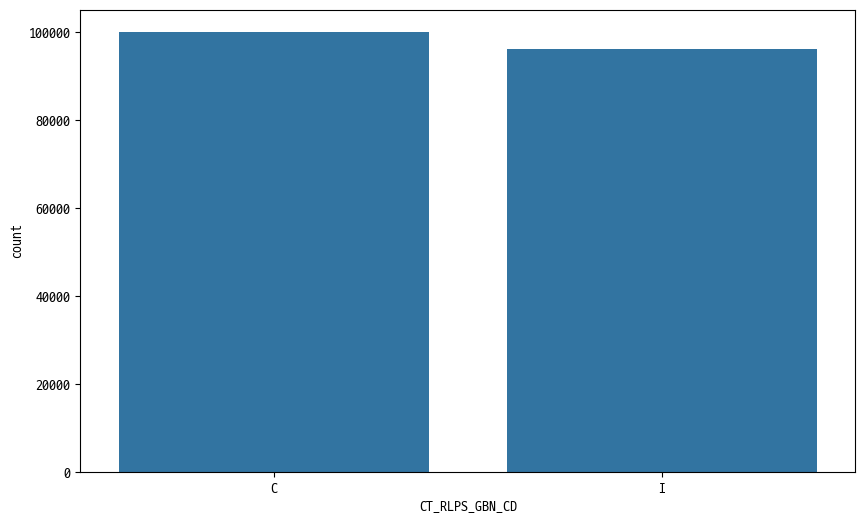

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='CT_RLPS_GBN_CD')
plt.show()

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

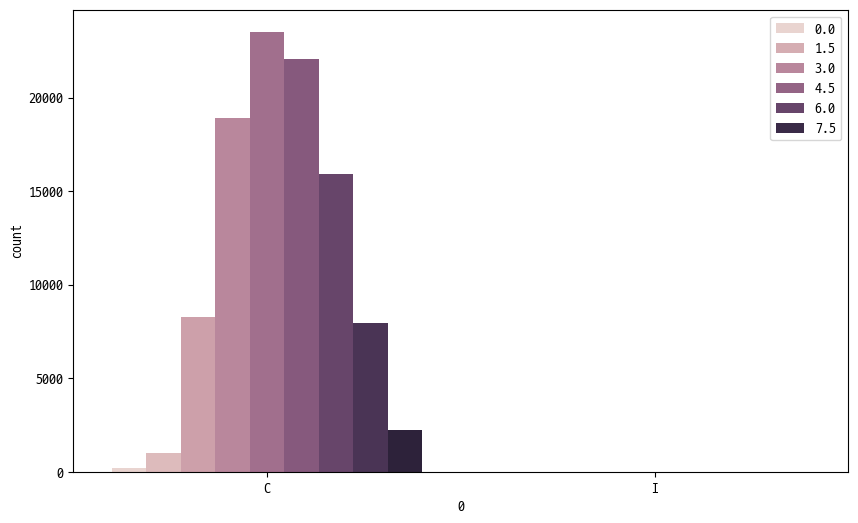

C
AGE_GROUP
4.0    23522
5.0    22084
3.0    18916
6.0    15904
2.0     8276
7.0     7949
8.0     2204
1.0     1022
0.0      224
Name: count, dtype: int64

I
Series([], Name: count, dtype: int64)



C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

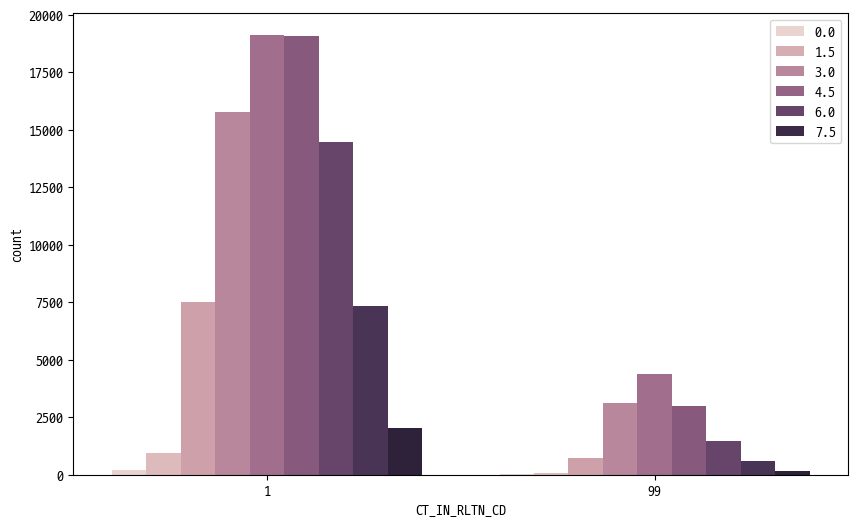

1
AGE_GROUP
4.0    19135
5.0    19083
3.0    15782
6.0    14457
2.0     7528
7.0     7359
8.0     2022
1.0      945
0.0      209
Name: count, dtype: int64

99
AGE_GROUP
4.0    4387
3.0    3134
5.0    3001
6.0    1447
2.0     748
7.0     590
8.0     182
1.0      77
0.0      15
Name: count, dtype: int64



C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

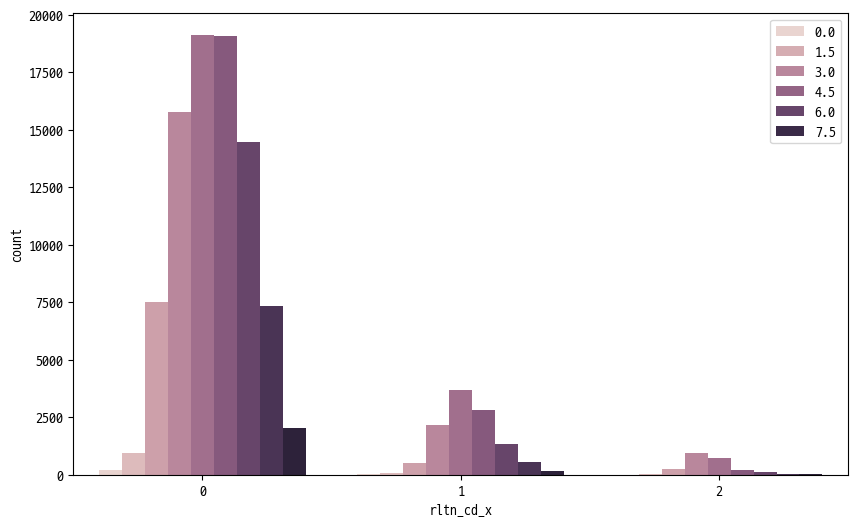

0
AGE_GROUP
4.0    19135
5.0    19083
3.0    15782
6.0    14457
2.0     7528
7.0     7359
8.0     2022
1.0      945
0.0      209
Name: count, dtype: int64

1
AGE_GROUP
4.0    3671
5.0    2810
3.0    2170
6.0    1323
7.0     548
2.0     505
8.0     160
1.0      64
0.0      15
Name: count, dtype: int64

2
AGE_GROUP
3.0    964
4.0    716
2.0    243
5.0    191
6.0    124
7.0     42
8.0     22
1.0     13
Name: count, dtype: int64



ValueError: cannot reindex on an axis with duplicate labels

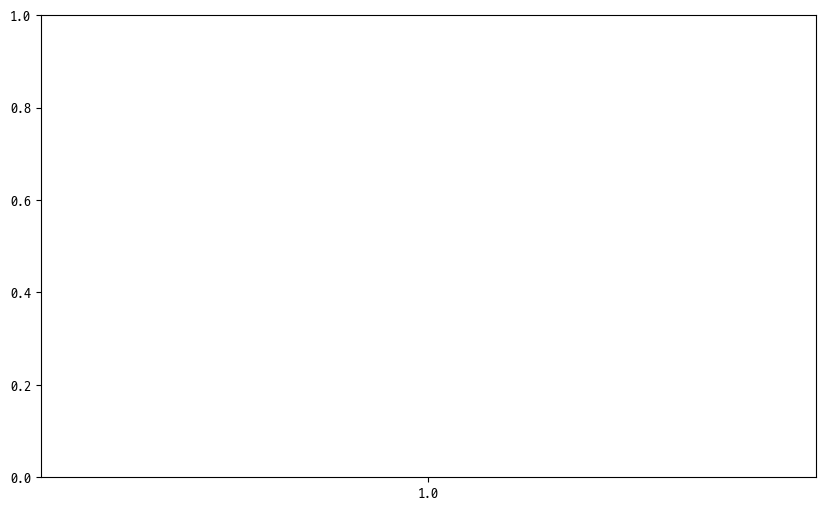

In [ ]:
# 시각화
# JOIN_SN	POL_SN	CT_RLPS_GBN_CD	CT_IN_RLTN_CD	rltn_cd_x	GENDER	AGE	AGE_GROUP	_merge

vis_list = ['CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD', 'rltn_cd_x','GENDER', 'AGE_GROUP']

def ctgr_value_counts(iumn_name):
    for uniq in list(final_df[iumn_name].unique()):
        cond_unique = (final_df[iumn_name]==uniq)
        print(uniq)
        print(final_df.loc[cond_unique]['AGE_GROUP'].value_counts())
        print()

for i in vis_list:
    plt.figure(figsize=(10,6))
    sns.countplot(data=final_df, x=i, hue='AGE_GROUP', hue_order=(0, 1, 2, 3, 4, 5, 6, 7, 8))     
    plt.legend(loc='best')
    plt.show()
    ctgr_value_counts(iumn_name=i)